In [1]:
import numpy as np
import pandas as pd
from numpy import interp
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, concatenate, BatchNormalization, Activation, add
from keras.layers import Conv2D, MaxPooling2D, Reshape, Flatten, Dense
from keras.models import Model, model_from_json
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
import pywt
np.set_printoptions(suppress=True)
from ResNet_12DCNN import ResNet
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
columns = ['Fx','Fy','Fz','Mx','My','Mz']
wavelet = 'db4'
max_iter = 50
iter = 0

In [3]:
# ## Load Data
# Insole1 = pd.read_csv('0310AyuRWalk5Min.txt', header=None, low_memory=False)
# Insole2 = pd.read_csv('0310HudaRWalk5Min.txt', header=None, low_memory=False)
# Insole3 = pd.read_csv('0311LalaRWalk5Min.txt', header=None, low_memory=False)
# Insole4 = pd.read_csv('0311YunitaRWalk5Min.txt', header=None, low_memory=False)
# Insole5 = pd.read_csv('0312AbelRWalk5Min.txt', header=None, low_memory=False)
# Insole6 = pd.read_csv('0312AbiRWalk5Min.txt', header=None, low_memory=False)
# Insole7 = pd.read_csv('0312AryaRWalk5Min.txt', header=None, low_memory=False)
# Insole8 = pd.read_csv('0312HawaRWalk5Min.txt', header=None, low_memory=False)
# Insole9 = pd.read_csv('0312NisaRWalk5Min.txt', header=None, low_memory=False)
# Insole10 = pd.read_csv('0313ChenChengRWalk5Min.txt', header=None, low_memory=False)
# Insole11 = pd.read_csv('0313RezaRWalk5Min.txt', header=None, low_memory=False)
# Insole12 = pd.read_csv('0313RilaniRWalk5Min.txt', header=None, low_memory=False)
# Insole13 = pd.read_csv('0313SariRWalk5Min.txt', header=None, low_memory=False)
# Insole14 = pd.read_csv('0313ShelbyRWalk5Min.txt', header=None, low_memory=False)
# Insole15 = pd.read_csv('0314HelenRWalk5Min.txt', header=None, low_memory=False)
# Insole16 = pd.read_csv('0315AyuRWalk5Min.txt', header=None, low_memory=False)
# Insole17 = pd.read_csv('0315HappyRWalk5Min.txt', header=None, low_memory=False)
# Insole18 = pd.read_csv('0317HeniRWalk5Min.txt', header=None, low_memory=False)
# Insole19 = pd.read_csv('0317NadiaRWalk5Min.txt', header=None, low_memory=False)
# Insole20 = pd.read_csv('0317VikaRWalk5Min.txt', header=None, low_memory=False)
# Insole21 = pd.read_csv('0319AlfianRWalk5Min.txt', header=None, low_memory=False)
# Insole22 = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
# SIData1 =  np.array(Insole1)
# SIData2 =  np.array(Insole2)
# SIData3 =  np.array(Insole3)
# SIData4 =  np.array(Insole4)
# SIData5 =  np.array(Insole5)
# SIData6 =  np.array(Insole6)
# SIData7 =  np.array(Insole7)
# SIData8 =  np.array(Insole8)
# SIData9 =  np.array(Insole9)
# SIData10 =  np.array(Insole10)
# SIData11 =  np.array(Insole11)
# SIData12 =  np.array(Insole12)
# SIData13 =  np.array(Insole13)
# SIData14 =  np.array(Insole14)
# SIData15 =  np.array(Insole15)
# SIData16 =  np.array(Insole16)
# SIData17 =  np.array(Insole17)
# SIData18 =  np.array(Insole18)
# SIData19 =  np.array(Insole19)
# SIData20 =  np.array(Insole20)
# SIData21 =  np.array(Insole21)
# SIData22 =  np.array(Insole22)

# df1 = pd.read_csv('0310AyuRWalk5Min.csv', low_memory=False)
# df2 = pd.read_csv('0310HudaRWalk5Min.csv', low_memory=False)
# df3 = pd.read_csv('0311LalaRWalk5Min.csv', low_memory=False)
# df4 = pd.read_csv('0311YunitaRWalk5Min.csv', low_memory=False)
# df5 = pd.read_csv('0312AbelRWalk5Min.csv', low_memory=False)
# df6 = pd.read_csv('0312AbiRWalk5Min.csv', low_memory=False)
# df7 = pd.read_csv('0312AryaRWalk5Min.csv', low_memory=False)
# df8 = pd.read_csv('0312HawaRWalk5Min.csv', low_memory=False)
# df9 = pd.read_csv('0312NisaRWalk5Min.csv', low_memory=False)
# df10 = pd.read_csv('0313ChenChengRWalk5Min.csv', low_memory=False)
# df11 = pd.read_csv('0313RezaRWalk5Min.csv', low_memory=False)
# df12 = pd.read_csv('0313RilaniRWalk5Min.csv', low_memory=False)
# df13 = pd.read_csv('0313SariRWalk5Min.csv', low_memory=False)
# df14 = pd.read_csv('0313ShelbyRWalk5Min.csv', low_memory=False)
# df15 = pd.read_csv('0314HelenRWalk5Min.csv', low_memory=False)
# df16 = pd.read_csv('0315AyuRWalk5Min.csv', low_memory=False)
# df17 = pd.read_csv('0315HappyRWalk5Min.csv', low_memory=False)
# df18 = pd.read_csv('0317HeniRWalk5Min.csv', low_memory=False)
# df19 = pd.read_csv('0317NadiaRWalk5Min.csv', low_memory=False)
# df20 = pd.read_csv('0317VikaRWalk5Min.csv', low_memory=False)
# df21 = pd.read_csv('0319AlfianRWalk5Min.csv', low_memory=False)
# df22 = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)

# selected_df1 = df1[columns]
# selected_df2 = df2[columns]
# selected_df3 = df3[columns]
# selected_df4 = df4[columns]
# selected_df5 = df5[columns]
# selected_df6 = df6[columns]
# selected_df7 = df7[columns]
# selected_df8 = df8[columns]
# selected_df9 = df9[columns]
# selected_df10 = df10[columns]
# selected_df11 = df11[columns]
# selected_df12 = df12[columns]
# selected_df13 = df13[columns]
# selected_df14 = df14[columns]
# selected_df15 = df15[columns]
# selected_df16 = df16[columns]
# selected_df17 = df17[columns]
# selected_df18 = df18[columns]
# selected_df19 = df19[columns]
# selected_df20 = df20[columns]
# selected_df21 = df21[columns]
# selected_df22 = df22[columns]
# FPDatas1 = selected_df1[:15000]
# FPDatas2 = selected_df2[:15000]
# FPDatas3 = selected_df3[:15000]
# FPDatas4 = selected_df4[:15000]
# FPDatas5 = selected_df5[:15000]
# FPDatas6 = selected_df6[:15000]
# FPDatas7 = selected_df7[:15000]
# FPDatas8 = selected_df8[:15000]
# FPDatas9 = selected_df9[:15000]
# FPDatas10 = selected_df10[:15000]
# FPDatas11 = selected_df11[:15000]
# FPDatas12 = selected_df12[:15000]
# FPDatas13 = selected_df13[:15000]
# FPDatas14 = selected_df14[:15000]
# FPDatas15 = selected_df15[:15000]
# FPDatas16 = selected_df16[:15000]
# FPDatas17 = selected_df17[:15000]
# FPDatas18 = selected_df18[:15000]
# FPDatas19 = selected_df19[:15000]
# FPDatas20 = selected_df20[:15000]
# FPDatas21 = selected_df21[:15000]
# FPDatas22 = selected_df22[:15000]

# SmartInsole1 = np.array(SIData1[:15000]).astype('float64')
# SmartInsole2 = np.array(SIData2[:15000]).astype('float64')
# SmartInsole3 = np.array(SIData3[:15000]).astype('float64')
# SmartInsole4 = np.array(SIData4[:15000]).astype('float64')
# SmartInsole5 = np.array(SIData5[:15000]).astype('float64')
# SmartInsole6 = np.array(SIData6[:15000]).astype('float64')
# SmartInsole7 = np.array(SIData7[:15000]).astype('float64')
# SmartInsole8 = np.array(SIData8[:15000]).astype('float64')
# SmartInsole9 = np.array(SIData9[:15000]).astype('float64')
# SmartInsole10 = np.array(SIData10[:15000]).astype('float64')
# SmartInsole11 = np.array(SIData11[:15000]).astype('float64')
# SmartInsole12 = np.array(SIData12[:15000]).astype('float64')
# SmartInsole13 = np.array(SIData13[:15000]).astype('float64')
# SmartInsole14 = np.array(SIData14[:15000]).astype('float64')
# SmartInsole15 = np.array(SIData15[:15000]).astype('float64')
# SmartInsole16 = np.array(SIData16[:15000]).astype('float64')
# SmartInsole17 = np.array(SIData17[:15000]).astype('float64')
# SmartInsole18 = np.array(SIData18[:15000]).astype('float64')
# SmartInsole19 = np.array(SIData19[:15000]).astype('float64')
# SmartInsole20 = np.array(SIData20[:15000]).astype('float64')
# SmartInsole21 = np.array(SIData21[:15000]).astype('float64')
# SmartInsole22 = np.array(SIData22[:15000]).astype('float64')
# FPData1 = np.array(FPDatas1).astype('float64')
# FPData2 = np.array(FPDatas2).astype('float64')
# FPData3= np.array(FPDatas3).astype('float64')
# FPData4= np.array(FPDatas4).astype('float64')
# FPData5= np.array(FPDatas5).astype('float64')
# FPData6= np.array(FPDatas6).astype('float64')
# FPData7= np.array(FPDatas7).astype('float64')
# FPData8= np.array(FPDatas8).astype('float64')
# FPData9= np.array(FPDatas9).astype('float64')
# FPData10 = np.array(FPDatas10).astype('float64')
# FPData11 = np.array(FPDatas11).astype('float64')
# FPData12= np.array(FPDatas12).astype('float64')
# FPData13= np.array(FPDatas13).astype('float64')
# FPData14= np.array(FPDatas14).astype('float64')
# FPData15= np.array(FPDatas15).astype('float64')
# FPData16= np.array(FPDatas16).astype('float64')
# FPData17= np.array(FPDatas17).astype('float64')
# FPData18= np.array(FPDatas18).astype('float64')
# FPData19= np.array(FPDatas19).astype('float64')
# FPData20= np.array(FPDatas20).astype('float64')
# FPData21= np.array(FPDatas21).astype('float64')
# FPData22= np.array(FPDatas22).astype('float64')

# SIDataset = np.concatenate((SmartInsole1, SmartInsole2, SmartInsole3,
#                             SmartInsole4, SmartInsole5, SmartInsole6,
#                             SmartInsole7, SmartInsole8, SmartInsole9,
#                             SmartInsole10, SmartInsole11, SmartInsole12,
#                             SmartInsole13, SmartInsole14, SmartInsole15,
#                             SmartInsole16, SmartInsole17, SmartInsole18,
#                             SmartInsole19, SmartInsole20, SmartInsole21), axis=0)
# FPDataset = np.concatenate((FPData1, FPData2, FPData3,
#                             FPData4, FPData5, FPData6,
#                             FPData7, FPData8, FPData9,
#                             FPData10, FPData11, FPData12,
#                             FPData13, FPData14, FPData15,
#                             FPData16, FPData17, FPData18,
#                             FPData19, FPData20, FPData21), axis=0)

In [4]:
## Load Data
Insole = pd.read_csv('1225JakariaRWalk5Min.txt', header=None, low_memory=False)
SIData =  np.array(Insole)

df = pd.read_csv('1225JakariaRWalk5Min.csv', low_memory=False)
selected_df = df[columns]
FPDatas = selected_df[:15000]

SmartInsole = np.array(SIData[:15000]).astype('float64')
FPDataset = np.array(FPDatas).astype('float64')

FXData = FPDataset[:,0]/2
FXData =  np.array(FXData)
FXData = FXData.reshape(-1,1)
FYData = FPDataset[:,1]/5
FYData =  np.array(FYData)
FYData = FYData.reshape(-1,1)
FZData = (FPDataset[:,2])/100
FZData =  np.array(FZData)
FZData = FZData.reshape(-1,1)
MXData = (FPDataset[:,3])/10000
MXData =  np.array(MXData)
MXData = MXData.reshape(-1,1)
MYData = (FPDataset[:,4])/10000
MYData =  np.array(MYData)
MYData = MYData.reshape(-1,1)
MZData = (FPDataset[:,5])/1000
MZData =  np.array(MZData)
MZData = MZData.reshape(-1,1)

newFPDataset = np.concatenate((FXData, FYData, FZData, MXData, MYData, MZData), axis=1)
## End Load Data


SIDWTcoeffs = []
for i in range(89):
    coeffs = pywt.wavedec(SmartInsole[:, i], wavelet)
    coeffs[-1] = np.zeros_like(coeffs[-1])
    # coeffs[-2] = np.zeros_like(coeffs[-2])
    # coeffs[-3] = np.zeros_like(coeffs[-3])
    # coeffs[-4] = np.zeros_like(coeffs[-4])
    # coeffs[-5] = np.zeros_like(coeffs[-5])
    # coeffs[-6] = np.zeros_like(coeffs[-6])
    SIDWTcoeffs.append(coeffs)

SIData_filtered = np.zeros(SmartInsole.shape)
for i in range(89):
    SIData_filtered[:, i] = pywt.waverec(SIDWTcoeffs[i], wavelet, mode='symmetric', axis=0)

max_iter = 50
iter = 0
for i in range(len(SIData_filtered)):
    SIData_filtered[i][0] = SIData_filtered[i][0] + (iter % max_iter) + 1
    iter += 1

for i in range(len(SIData_filtered)):
    SIData_filtered[i][np.abs(SIData_filtered[i]) < 1] = 0


# Data Normalization
minInsole = SIData_filtered.min()
maxInsole = SIData_filtered.max()
xscale = (SIData_filtered - minInsole) / ( maxInsole - minInsole )

FPmax = []
FPmin = []
yscale = []

for i in range(0,6):
    minFP = FPDataset[:,i].min()
    maxFP = FPDataset[:,i].max()
    FPmin.append(minFP)
    FPmax.append(maxFP)

FPmin = np.array(FPmin)
FPmax = np.array(FPmax)

for i in range(0,6):
  scale = (FPDataset[:,i] - FPmin[i]) / ( FPmax[i] - FPmin[i] )
  yscale.append(scale)
yscale = np.array(yscale)
yscale = yscale.transpose()
#End Data Normalization

#Spliting Data
sample_size = xscale.shape[0] # number of samples in train set
time_steps  = xscale.shape[1] # number of features in train set
input_dimension = 1               # each feature is represented by 1 number

train_data_reshaped = xscale.reshape(sample_size,time_steps,input_dimension)

smart_insole_data_scaled_Train = train_data_reshaped[:12000]
smart_insole_data_scaled_Test = train_data_reshaped[12000:]
force_plate_data_scaled_Train = yscale[:12000]
force_plate_data_scaled_Test = yscale[12000:]

# Generate random indices for shuffling the data
indices = np.arange(smart_insole_data_scaled_Train.shape[0])
np.random.shuffle(indices)

# Use the shuffled indices to randomly select training data
X_train = smart_insole_data_scaled_Train[indices]
y_train = force_plate_data_scaled_Train[indices]

Test_indices = np.arange(smart_insole_data_scaled_Test.shape[0])
np.random.shuffle(Test_indices)

# # Assign the test data
X_test = smart_insole_data_scaled_Test[Test_indices]
y_test = force_plate_data_scaled_Test[Test_indices]

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
#End Spliting Data

(12000, 89, 1) (3000, 89, 1)
(12000, 6) (3000, 6)


In [5]:
"Configurations for ResNet in Regression Mode"
length = X_train.shape[1]   # Number of Features (or length of the signal)
model_width = 64           # Number of Filter or Kernel in the Input Layer
num_channel = 1             # Number of Input Channels
problem_type = 'Regression' # Regression or Classification
output_number = 6           # Number of Outputs in the Regression Mode

In [6]:
Regression_Model = ResNet(length, num_channel, model_width, problem_type=problem_type, output_nums=output_number).ResNet50() # Build Model
# ResNet Models supported: ResNet18, ResNet34, ResNet50, ResNet101, ResNet152, 
Regression_Model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics= ['mse']) # Compile Model
# Here, Model validation metric is set as Mean Squared Error or MSE

In [7]:
Regression_Model.summary() # Summary of the Model

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 89, 1)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 45, 64)       512         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 45, 64)      256         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 45, 64)       0           ['batch_normalization[0][0]']

 activation_11 (Activation)     (None, 11, 128)      0           ['batch_normalization_8[0][0]']  
                                                                                                  
 conv1d_9 (Conv1D)              (None, 11, 128)      49280       ['activation_11[0][0]']          
                                                                                                  
 batch_normalization_9 (BatchNo  (None, 11, 128)     512         ['conv1d_9[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 activation_12 (Activation)     (None, 11, 128)      0           ['batch_normalization_9[0][0]']  
                                                                                                  
 conv1d_10 (Conv1D)             (None, 11, 128)      49280       ['activation_12[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_24 (Activation)     (None, 6, 256)       0           ['batch_normalization_18[0][0]'] 
                                                                                                  
 add_6 (Add)                    (None, 6, 256)       0           ['activation_24[0][0]',          
                                                                  'activation_22[0][0]']          
                                                                                                  
 activation_25 (Activation)     (None, 6, 256)       0           ['add_6[0][0]']                  
                                                                                                  
 conv1d_19 (Conv1D)             (None, 6, 256)       196864      ['activation_25[0][0]']          
          

 activation_37 (Activation)     (None, 6, 256)       0           ['add_10[0][0]']                 
                                                                                                  
 conv1d_27 (Conv1D)             (None, 3, 512)       393728      ['activation_37[0][0]']          
                                                                                                  
 batch_normalization_27 (BatchN  (None, 3, 512)      2048        ['conv1d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_38 (Activation)     (None, 3, 512)       0           ['batch_normalization_27[0][0]'] 
                                                                                                  
 conv1d_28 (Conv1D)             (None, 3, 512)       786944      ['activation_38[0][0]']          
          

In [8]:
callbacks = [EarlyStopping(monitor='val_loss', patience=30, mode='min'), ModelCheckpoint('1Person_Walking_ResNet18.h5', verbose=1, monitor='val_loss', save_best_only=True, mode='min')]
history = Regression_Model.fit(X_train, y_train, epochs=500, batch_size=64,
                               verbose=1, validation_split=0.2, shuffle=True)


# history = Regression_Model.fit(X_train, y_train, batch_size=64, epochs=500,
#                     validation_data=(X_test, y_test), verbose=2,
#                     callbacks=[callbacks.EarlyStopping(monitor='val_loss', patience=30,verbose=2, mode='auto')])


Epoch 1/500
150/150 [==============================] - 15s 59ms/step - loss: 0.1638 - mse: 0.1638 - val_loss: 0.0895 - val_mse: 0.0895
Epoch 2/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0401 - mse: 0.0401 - val_loss: 0.0690 - val_mse: 0.0690
Epoch 3/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0280 - mse: 0.0280 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 4/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0211 - mse: 0.0211 - val_loss: 0.0284 - val_mse: 0.0284
Epoch 5/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0181 - mse: 0.0181 - val_loss: 0.0191 - val_mse: 0.0191
Epoch 6/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0159 - mse: 0.0159 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 7/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0156 - mse: 0.0156 - val_loss: 0.0285 - val_mse: 0.0285
Epoch 8/500
150/150 [==============================] - 8s 52m

Epoch 62/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 63/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 64/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 65/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0076 - val_mse: 0.0076
Epoch 66/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0028 - val_mse: 0.0028
Epoch 67/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0051 - val_mse: 0.0051
Epoch 68/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 0.0074 - val_mse: 0.0074
Epoch 69/500
150/150 [==============================] -

150/150 [==============================] - 8s 52ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 123/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 124/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 125/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 126/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 127/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 128/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 129/500
150/150 [==============================] - 8s 52

150/150 [==============================] - 8s 52ms/step - loss: 6.2042e-04 - mse: 6.2042e-04 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 181/500
150/150 [==============================] - 8s 52ms/step - loss: 6.9944e-04 - mse: 6.9944e-04 - val_loss: 0.0030 - val_mse: 0.0030
Epoch 182/500
150/150 [==============================] - 8s 52ms/step - loss: 7.4101e-04 - mse: 7.4101e-04 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 183/500
150/150 [==============================] - 8s 52ms/step - loss: 6.4912e-04 - mse: 6.4912e-04 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 184/500
150/150 [==============================] - 8s 52ms/step - loss: 0.0010 - mse: 0.0010 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 185/500
150/150 [==============================] - 8s 52ms/step - loss: 5.7603e-04 - mse: 5.7603e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 186/500
150/150 [==============================] - 8s 52ms/step - loss: 6.5375e-04 - mse: 6.5375e-04 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 187/500


150/150 [==============================] - 8s 52ms/step - loss: 5.4443e-04 - mse: 5.4443e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 238/500
150/150 [==============================] - 8s 52ms/step - loss: 4.1110e-04 - mse: 4.1110e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 239/500
150/150 [==============================] - 8s 52ms/step - loss: 6.7154e-04 - mse: 6.7154e-04 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 240/500
150/150 [==============================] - 8s 52ms/step - loss: 6.2017e-04 - mse: 6.2017e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 241/500
150/150 [==============================] - 8s 52ms/step - loss: 4.8992e-04 - mse: 4.8992e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 242/500
150/150 [==============================] - 8s 52ms/step - loss: 4.1171e-04 - mse: 4.1171e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 243/500
150/150 [==============================] - 8s 52ms/step - loss: 4.8292e-04 - mse: 4.8292e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 

Epoch 294/500
150/150 [==============================] - 8s 52ms/step - loss: 4.0472e-04 - mse: 4.0472e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 295/500
150/150 [==============================] - 8s 52ms/step - loss: 3.7929e-04 - mse: 3.7929e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 296/500
150/150 [==============================] - 8s 52ms/step - loss: 3.0113e-04 - mse: 3.0113e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 297/500
150/150 [==============================] - 8s 52ms/step - loss: 3.5488e-04 - mse: 3.5488e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 298/500
150/150 [==============================] - 8s 52ms/step - loss: 3.2396e-04 - mse: 3.2396e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 299/500
150/150 [==============================] - 8s 52ms/step - loss: 3.8980e-04 - mse: 3.8980e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 300/500
150/150 [==============================] - 8s 52ms/step - loss: 4.4652e-04 - mse: 4.4652e-04 - val_loss: 0.0019 - val_mse:

Epoch 351/500
150/150 [==============================] - 8s 52ms/step - loss: 5.4613e-04 - mse: 5.4613e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 352/500
150/150 [==============================] - 8s 52ms/step - loss: 3.1741e-04 - mse: 3.1741e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 353/500
150/150 [==============================] - 8s 52ms/step - loss: 3.0791e-04 - mse: 3.0791e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 354/500
150/150 [==============================] - 8s 52ms/step - loss: 3.4789e-04 - mse: 3.4789e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 355/500
150/150 [==============================] - 8s 52ms/step - loss: 4.2071e-04 - mse: 4.2071e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 356/500
150/150 [==============================] - 8s 52ms/step - loss: 3.3771e-04 - mse: 3.3771e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 357/500
150/150 [==============================] - 8s 52ms/step - loss: 2.5949e-04 - mse: 2.5949e-04 - val_loss: 0.0013 - val_mse:

Epoch 408/500
150/150 [==============================] - 8s 52ms/step - loss: 3.2239e-04 - mse: 3.2239e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 409/500
150/150 [==============================] - 8s 52ms/step - loss: 2.5369e-04 - mse: 2.5369e-04 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 410/500
150/150 [==============================] - 8s 52ms/step - loss: 2.2381e-04 - mse: 2.2381e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 411/500
150/150 [==============================] - 8s 52ms/step - loss: 2.5447e-04 - mse: 2.5447e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 412/500
150/150 [==============================] - 8s 52ms/step - loss: 2.6993e-04 - mse: 2.6993e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 413/500
150/150 [==============================] - 8s 52ms/step - loss: 3.0513e-04 - mse: 3.0513e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 414/500
150/150 [==============================] - 8s 52ms/step - loss: 2.4242e-04 - mse: 2.4242e-04 - val_loss: 0.0013 - val_mse:

Epoch 465/500
150/150 [==============================] - 8s 52ms/step - loss: 3.0836e-04 - mse: 3.0836e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 466/500
150/150 [==============================] - 8s 52ms/step - loss: 2.5117e-04 - mse: 2.5117e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 467/500
150/150 [==============================] - 8s 52ms/step - loss: 2.1168e-04 - mse: 2.1168e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 468/500
150/150 [==============================] - 8s 52ms/step - loss: 1.9672e-04 - mse: 1.9672e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 469/500
150/150 [==============================] - 8s 52ms/step - loss: 2.6528e-04 - mse: 2.6528e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 470/500
150/150 [==============================] - 8s 52ms/step - loss: 3.8061e-04 - mse: 3.8061e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 471/500
150/150 [==============================] - 8s 52ms/step - loss: 2.2510e-04 - mse: 2.2510e-04 - val_loss: 0.0022 - val_mse:

375/375 [==============================] - 7s 15ms/step


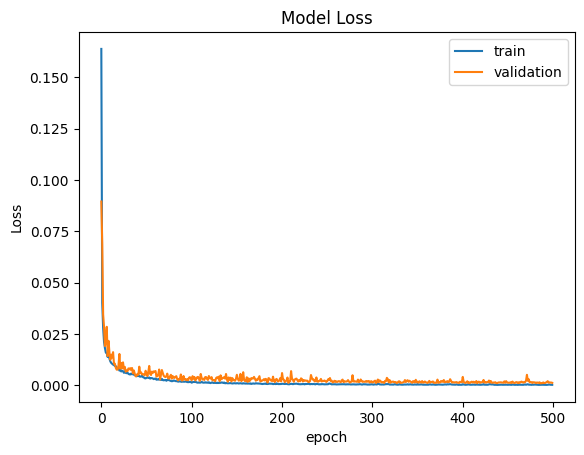

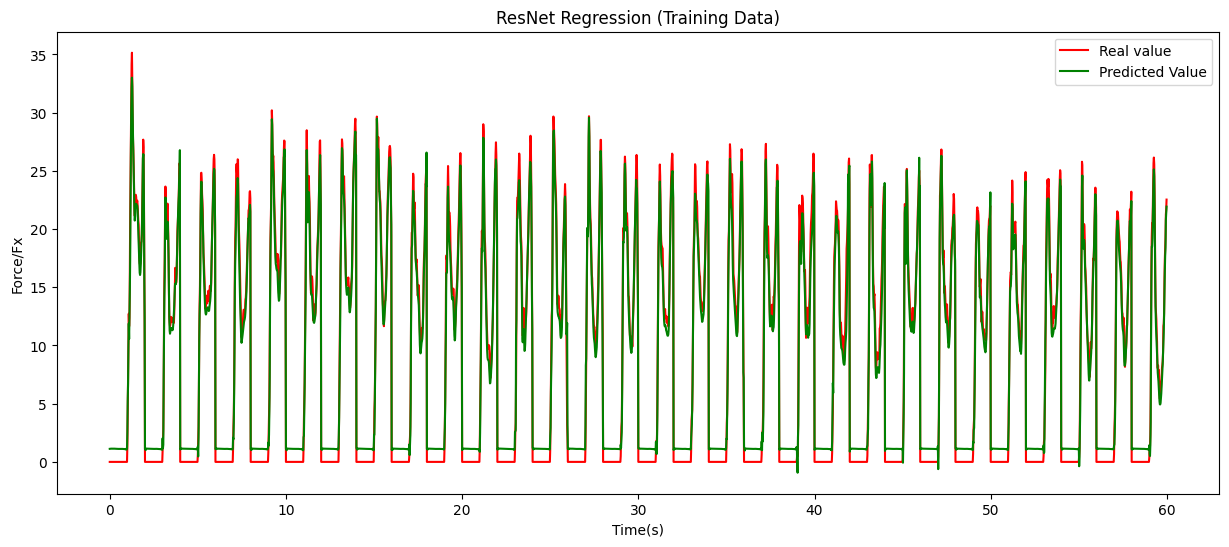

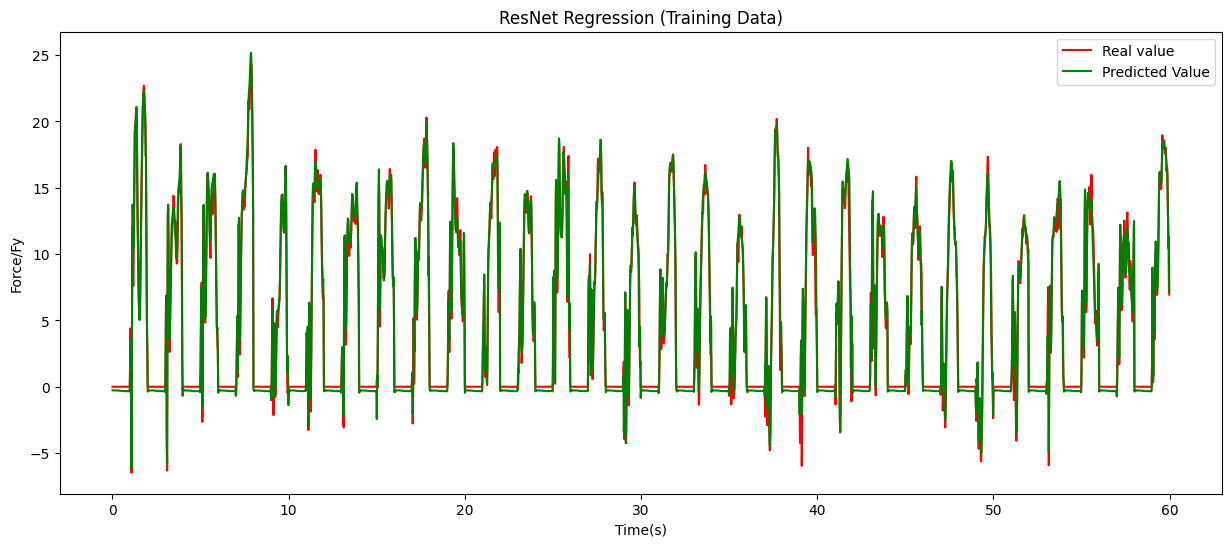

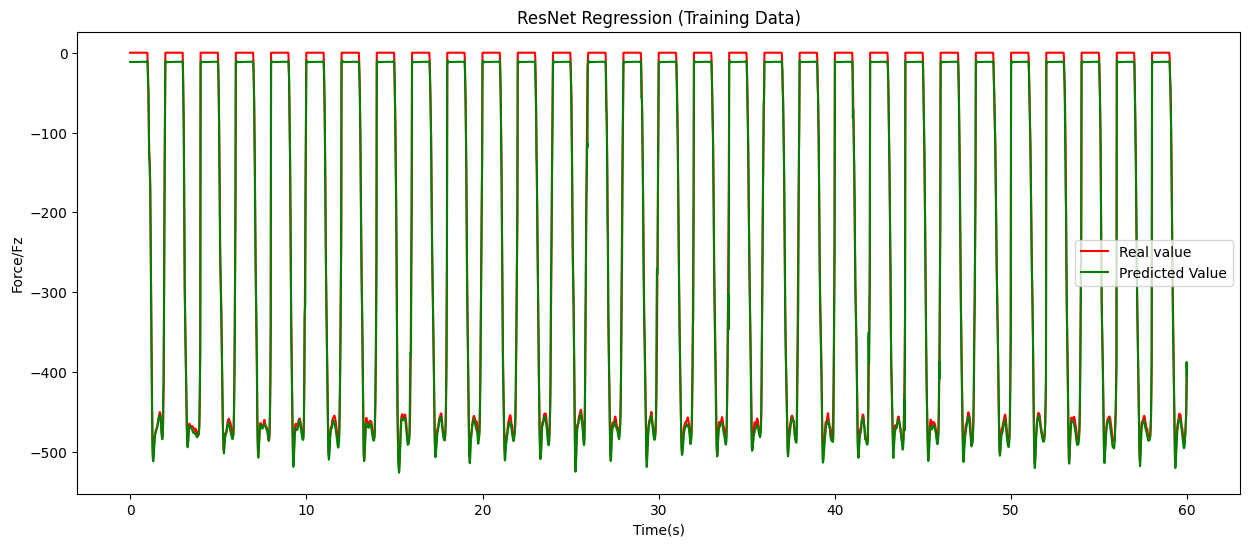

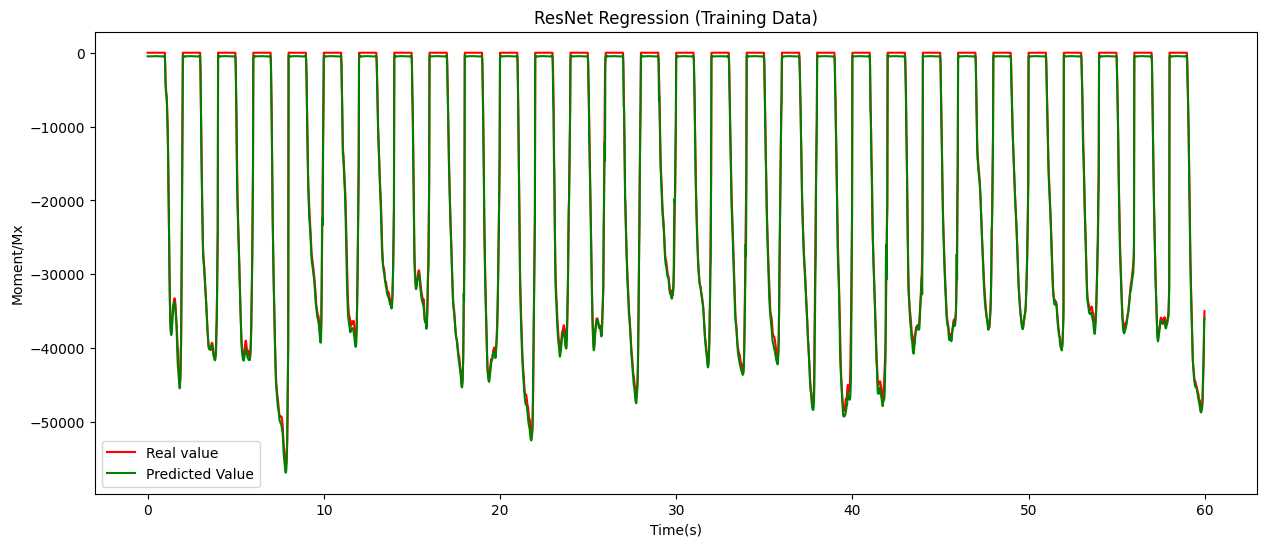

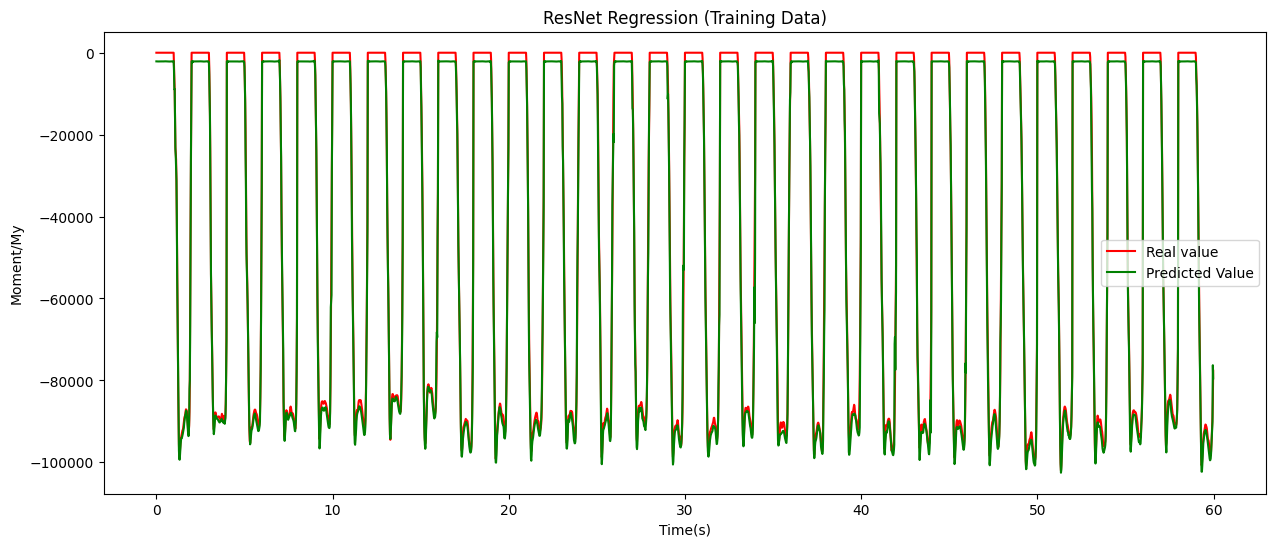

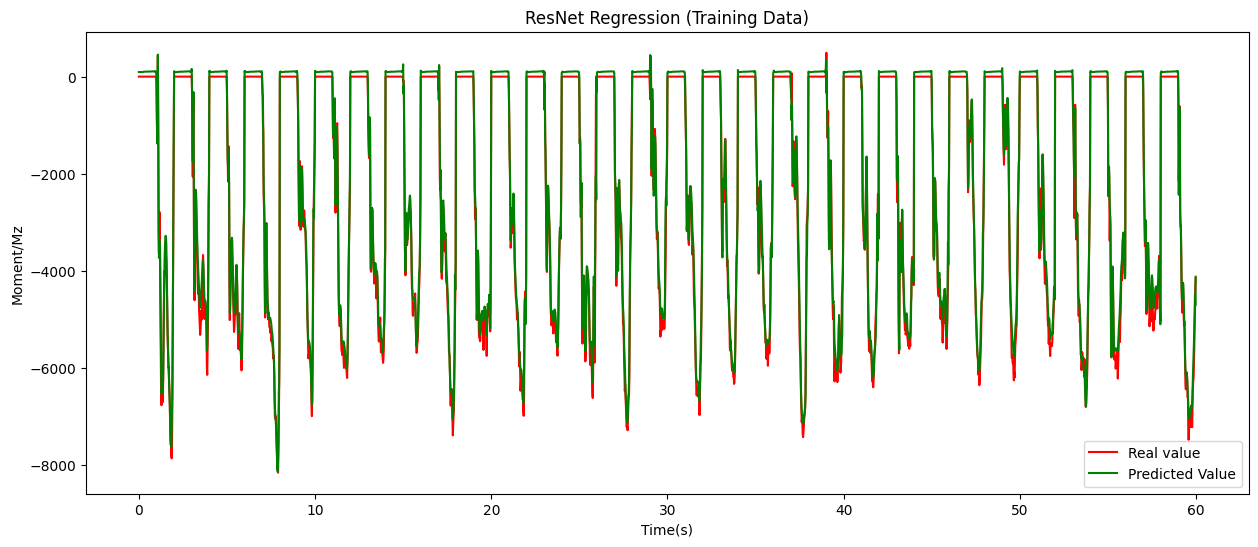

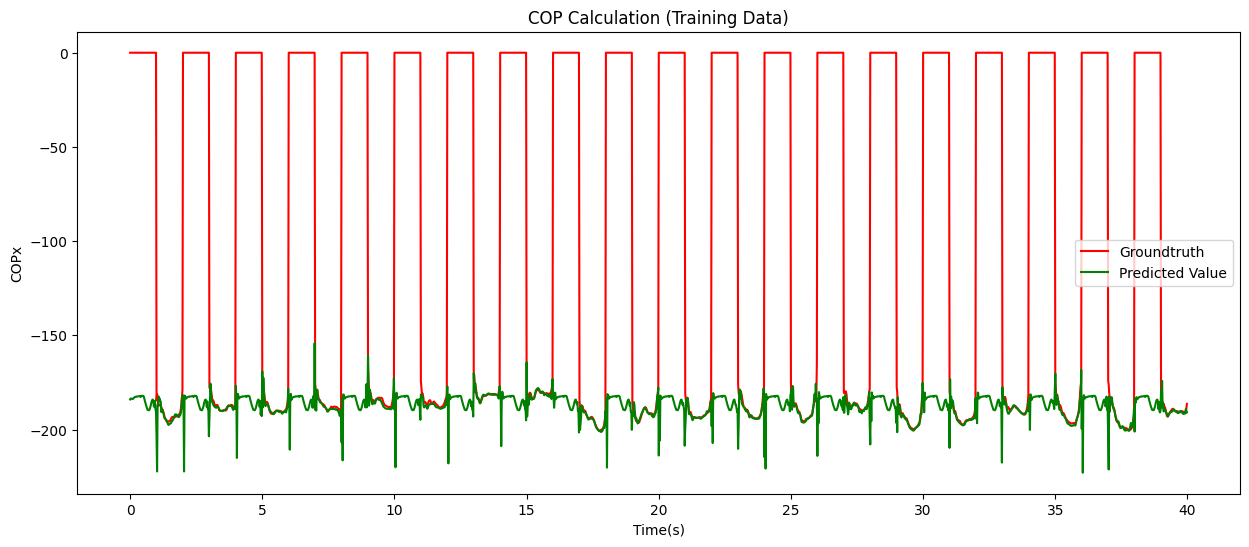

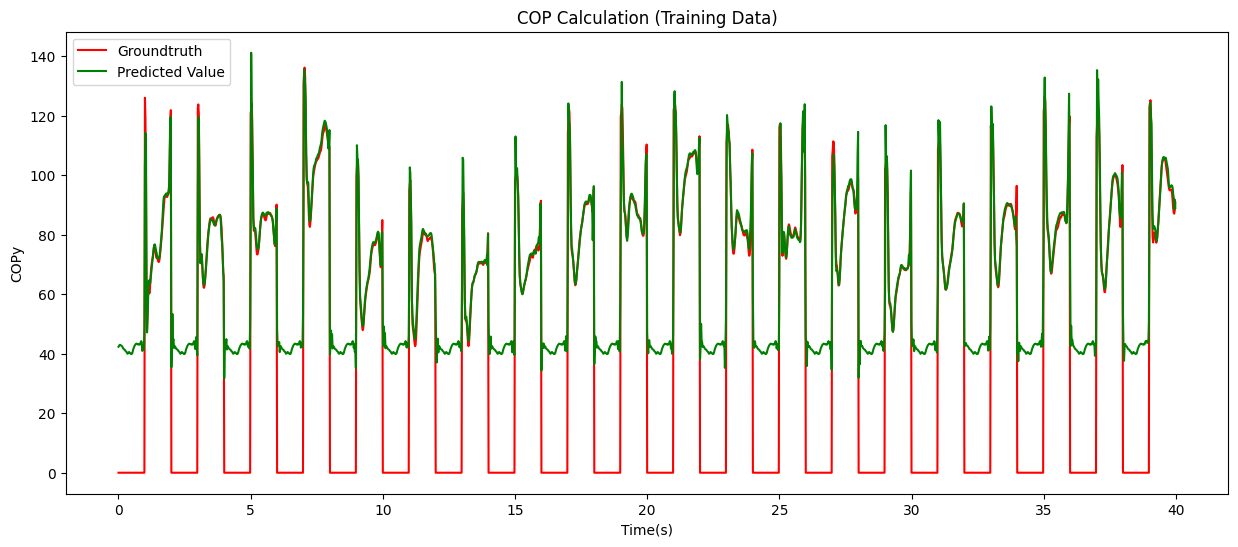

In [9]:
#Evaluate Model
Regression_Model.evaluate(X_train, y_train)
ypred = Regression_Model.predict(X_train)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
# plt.show()
plt.savefig('Loss Result.png')

# print('MSE: ',mean_squared_error(y_train, ypred))
# print('RMSE: ',math.sqrt(mean_squared_error(y_train, ypred)))
# print('Coefficient of determination (r2 Score): ', r2_score(y_train, ypred))


#Inverse
y_inverse = []
y_pred_inverse = []

for i in range(0,6):
  Y_inver =  y_train[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Pred_inver = ypred[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  y_inverse.append(Y_inver)
  y_pred_inverse.append(Pred_inver)
y_inverse = np.array(y_inverse)
y_inverse = y_inverse.transpose()
y_pred_inverse = np.array(y_pred_inverse)
y_pred_inverse = y_pred_inverse.transpose()

for i in range(len(y_pred_inverse)):
    if (np.abs(y_pred_inverse[i]) < 1).all():
        y_pred_inverse[i] = 0

for i in range(0, y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

# # restore to original Data
# FXData2 = y_inverse[:,0]*2
# FXData2=  np.array(FXData2)
# FXData2 = FXData2.reshape(-1,1)

# FYData2 = y_inverse[:,1]*5
# FYData2 =  np.array(FYData2)
# FYData2 = FYData2.reshape(-1,1)

# FZData2 = (y_inverse[:,2]*100)
# FZData2 =  np.array(FZData2)
# FZData2 = FZData2.reshape(-1,1)

# MXData2 = (y_inverse[:,3]*10000)
# MXData2 =  np.array(MXData2)
# MXData2 = MXData2.reshape(-1,1)

# MYData2 = (y_inverse[:,4]*10000)
# MYData2 =  np.array(MYData2)
# MYData2 = MYData2.reshape(-1,1
#                           )
# MZData2 = (y_inverse[:,5]*1000)
# MZData2 =  np.array(MZData2)
# MZData2 = MZData2.reshape(-1,1)

# new_inverse2 = np.concatenate((FXData2, FYData2, FZData2, MXData2, MYData2, MZData2), axis=1)

# FXData3 = y_pred_inverse[:,0]*2
# FXData3=  np.array(FXData3)
# FXData3 = FXData3.reshape(-1,1)

# FYData3 = y_pred_inverse[:,1]*5
# FYData3 =  np.array(FYData3)
# FYData3 = FYData3.reshape(-1,1)

# FZData3 = (y_pred_inverse[:,2]*100)
# FZData3 =  np.array(FZData3)
# FZData3 = FZData3.reshape(-1,1)

# MXData3 = (y_pred_inverse[:,3]*10000)
# MXData3 =  np.array(MXData3)
# MXData3 = MXData3.reshape(-1,1)

# MYData3 = (y_pred_inverse[:,4]*10000)
# MYData3 =  np.array(MYData3)
# MYData3 = MYData3.reshape(-1,1)

# MZData3 = (y_pred_inverse[:,5]*1000)
# MZData3 =  np.array(MZData3)
# MZData3 = MZData3.reshape(-1,1)

# new_inverse3 = np.concatenate((FXData3, FYData3, FZData3, MXData3, MYData3, MZData3), axis=1)

new_inverse2 = y_inverse
new_inverse3 = y_pred_inverse

new_inverse3 = new_inverse3[np.argsort(indices)]
new_inverse2 = new_inverse2[np.argsort(indices)]

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,new_inverse2[0:3000,i],color='red')
    plt.plot(x,new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Training Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Real value', 'Predicted Value'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

out_Fz = new_inverse2[:,2]
out_Mx = new_inverse2[:,3]
out_My = new_inverse2[:,4]
Pred_Fz = new_inverse3[:,2]
Pred_Mx = new_inverse3[:,3]
Pred_My = new_inverse3[:,4]

Pred_COPx=[]
for i in range(0,len(Pred_Fz)):
  Pred_COPx_temp=-(Pred_My[i])/Pred_Fz[i]
  # print(temp)
  if Pred_COPx_temp != Pred_COPx_temp:
    Pred_COPx_temp=0
  Pred_COPx.append(Pred_COPx_temp)
  # break

out_COPx=[]
for i in range(0,len(out_Fz)):
  out_COPx_temp=-(out_My[i])/out_Fz[i]
  # print(temp)
  if out_COPx_temp != out_COPx_temp:
    out_COPx_temp=0
  out_COPx.append(out_COPx_temp)
  # break

Pred_COPy=[]
for i in range(0,len(Pred_Mx)):
  Pred_COPy_temp=Pred_Mx[i]/Pred_Fz[i]
  # print(temp)
  if Pred_COPy_temp != Pred_COPy_temp:
    Pred_COPy_temp=0
  Pred_COPy.append(Pred_COPy_temp)
  # break

out_COPy=[]
for i in range(0,len(out_Mx)):
  out_COPy_temp=out_Mx[i]/out_Fz[i]
  # print(temp)
  if out_COPy_temp != out_COPy_temp:
    out_COPy_temp=0
  out_COPy.append(out_COPy_temp)
  # break


# out_COPx = -(out_My)/out_Fz
out_COPx = np.array(out_COPx)
out_COPx= out_COPx.reshape(-1,1)

# out_COPy = out_Mx/out_Fz
out_COPy = np.array(out_COPy)
out_COPy= out_COPy.reshape(-1,1)

# Pred_COPx = -(Pred_My)/Pred_Fz
Pred_COPx = np.array(Pred_COPx)
Pred_COPx= Pred_COPx.reshape(-1,1)

# Pred_COPy = Pred_Mx/Pred_Fz
Pred_COPy = np.array(Pred_COPy)
Pred_COPy= Pred_COPy.reshape(-1,1)

Pred_COP = np.concatenate((Pred_COPx, Pred_COPy), axis=1)
FC_COP = np.concatenate((out_COPx, out_COPy), axis=1)

col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,FC_COP[0:2000,i], color='red')
    plt.plot(x,Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Training Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
#     plt.savefig('Regression Result.png'[i])
    plt.show()

# # Trajectory
# from matplotlib import pyplot

# x = range(50)
# y1 = FC_COP[50:100,0]
# y2 = FC_COP[50:100,1]
# y3 = Pred_COP[50:100,0]
# y4 = Pred_COP[50:100,1]

# # pyplot.figure(figsize=(15,6))
# # pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# # pyplot.show()

# data_filter = abs(y1) > 0
# data_filter2 = abs(y3) > 0
# pyplot.figure(figsize=(15,6))
# pyplot.plot(y1[data_filter], y2[data_filter ], color='red', alpha=0.3)
# pyplot.plot(y3[data_filter2], y4[data_filter2 ], color='green')
# # pyplot.plot(y1, y2, color='red')
# # pyplot.plot(y3, y4, color='green')
# plt.title('COP Trajectory (Training Data)')
# pyplot.ylabel('COPy (mm)')
# pyplot.xlabel('COPx (mm)')
# pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
# pyplot.show()

In [10]:
# x = range(100)
# y1 = FC_COP[100:200,0]
# y2 = FC_COP[100:200,1]
# y3 = Pred_COP[100:200,0]
# y4 = Pred_COP[100:200,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(y1, y2, color='red')
# pyplot.plot(y3, y4, color='green')
# plt.title('COP Trajectory (Training Data)')
# pyplot.ylabel('COPy (mm)')
# pyplot.xlabel('COPx (mm)')
# pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
# pyplot.show()

94/94 [==============================] - 2s 14ms/step
MSE:  0.0072786252551230194
RMSE:  0.08531485952120545
Coefficient of determination (r2 Score):  0.8837741701097598


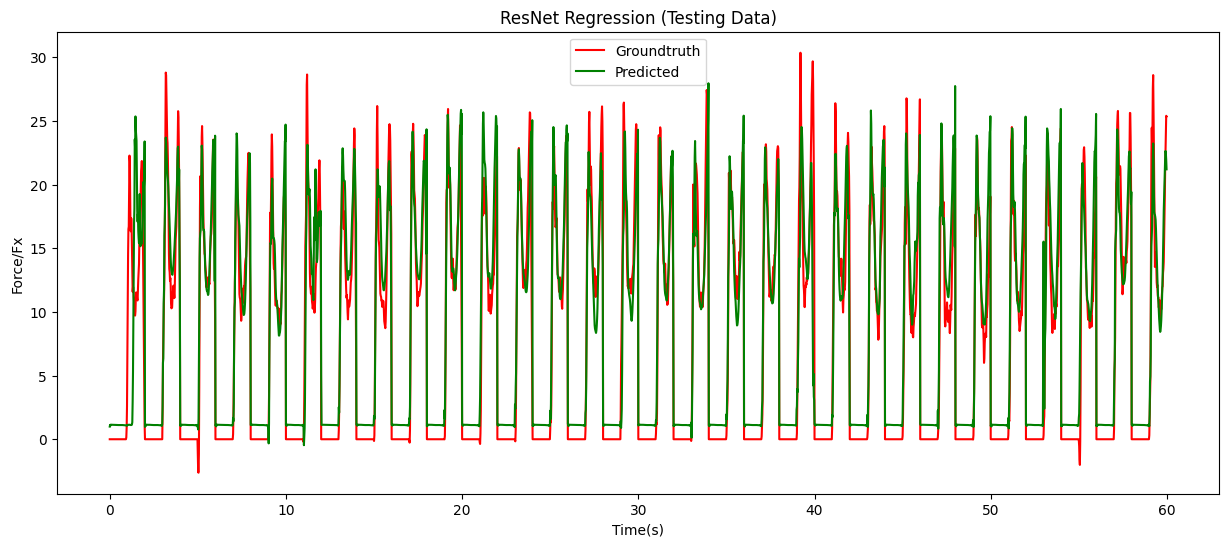

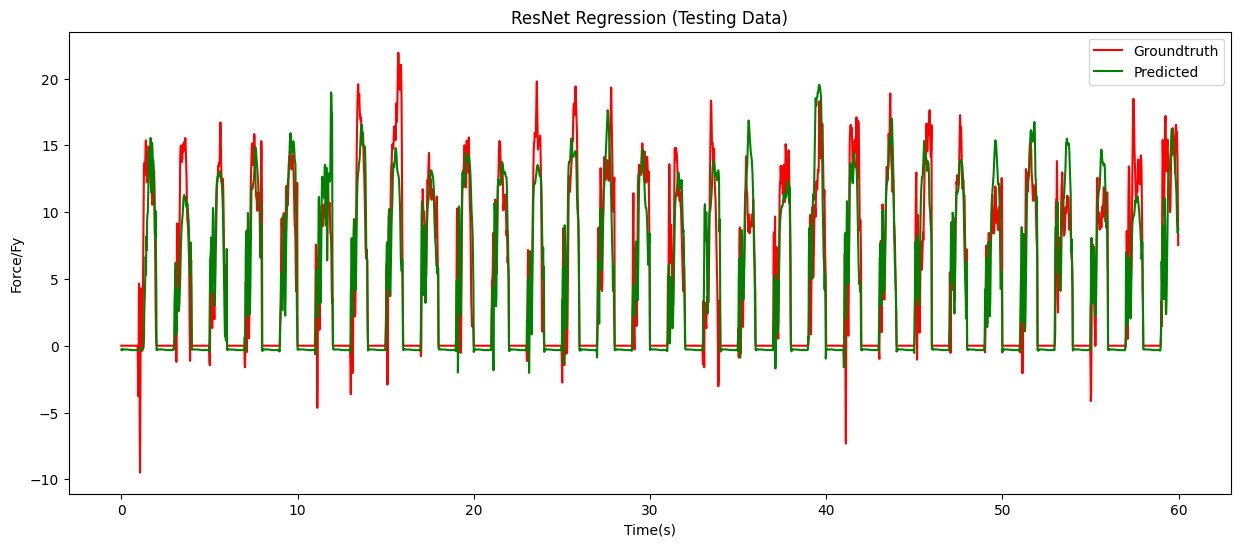

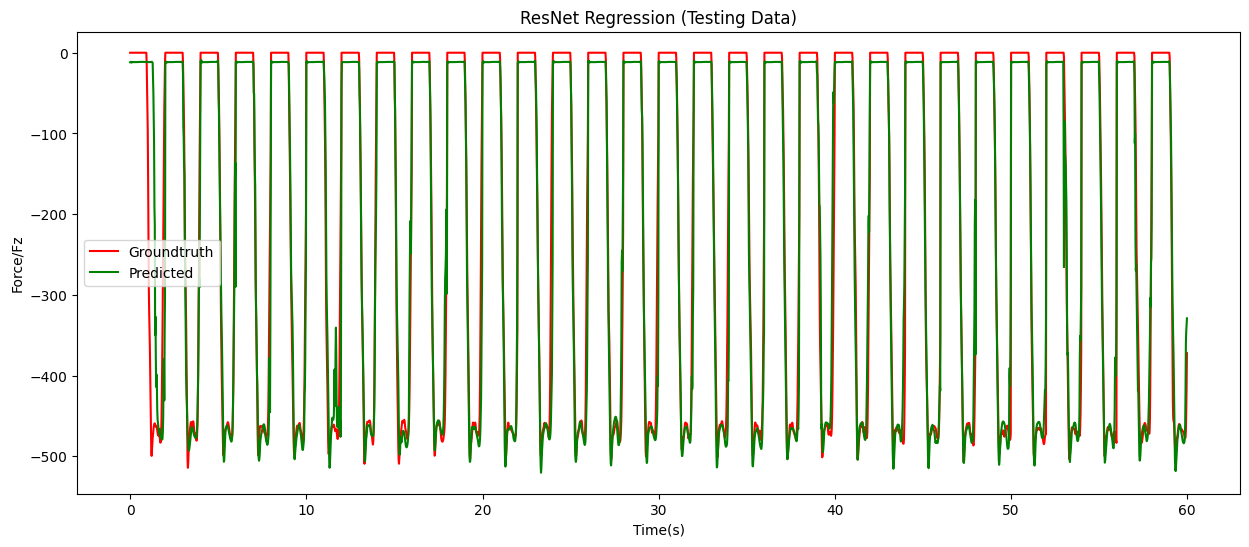

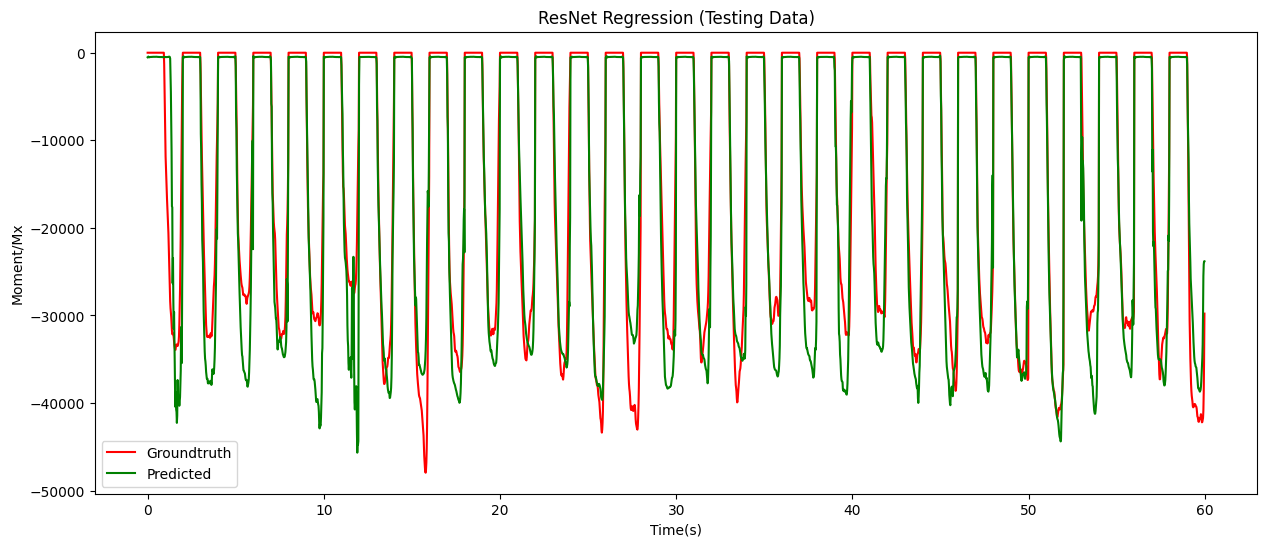

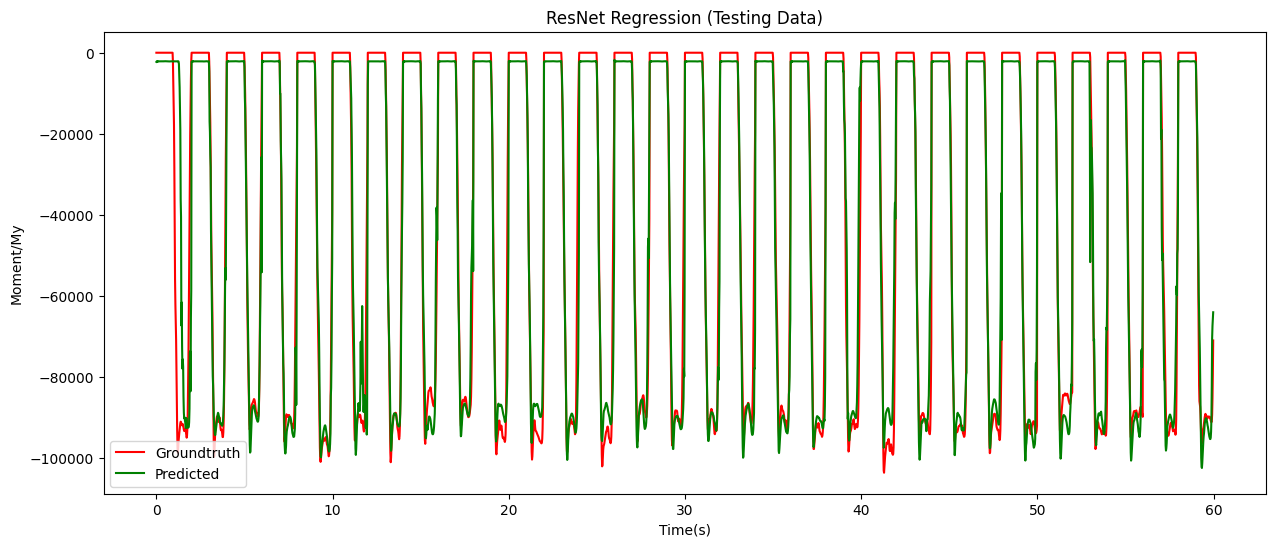

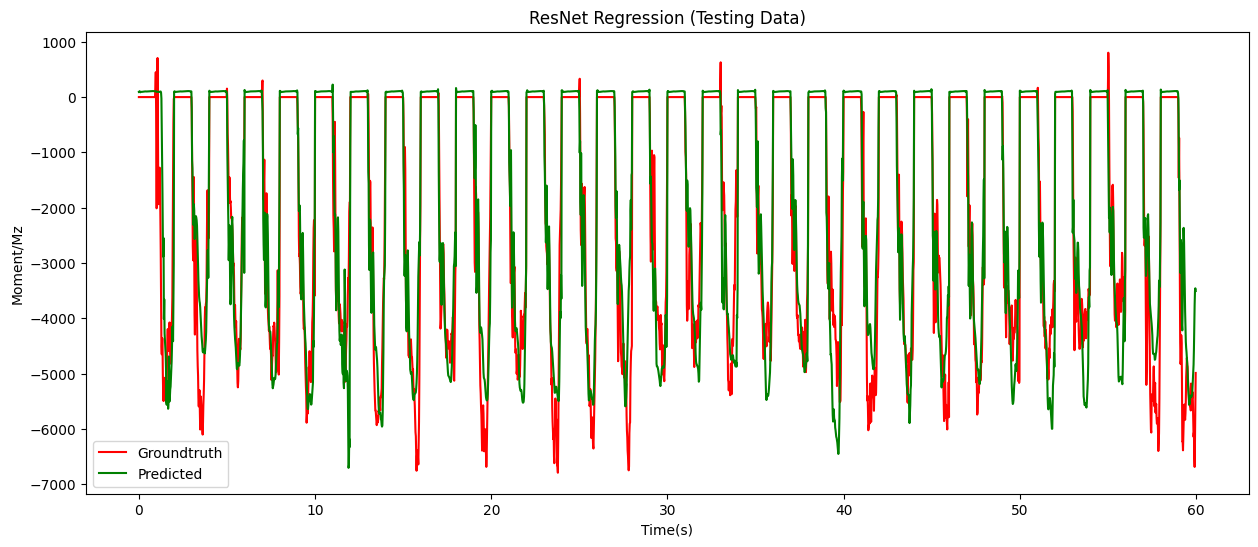

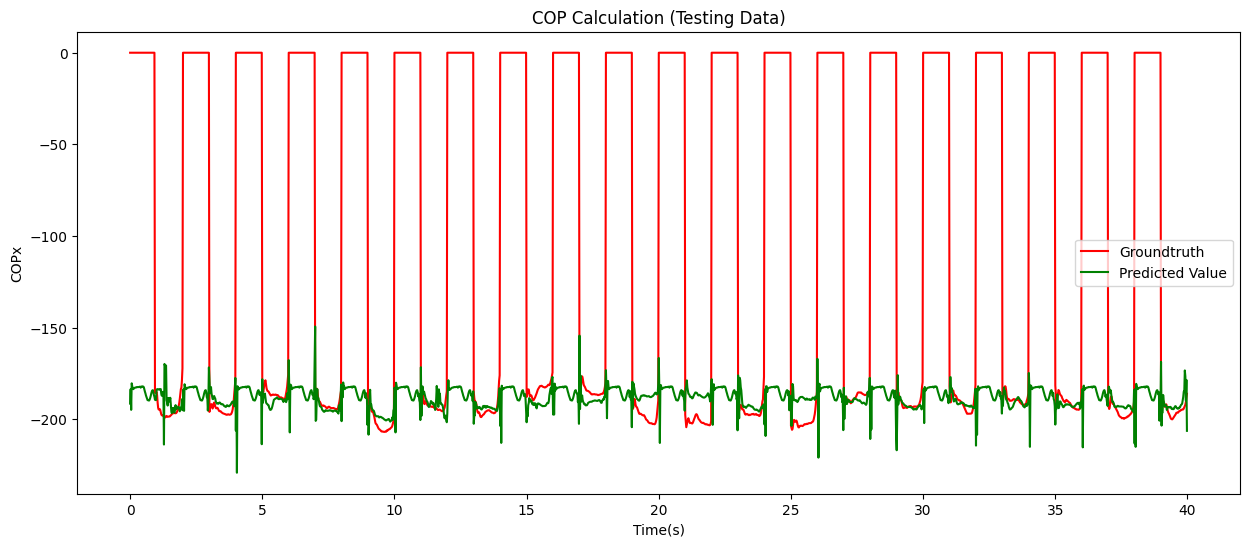

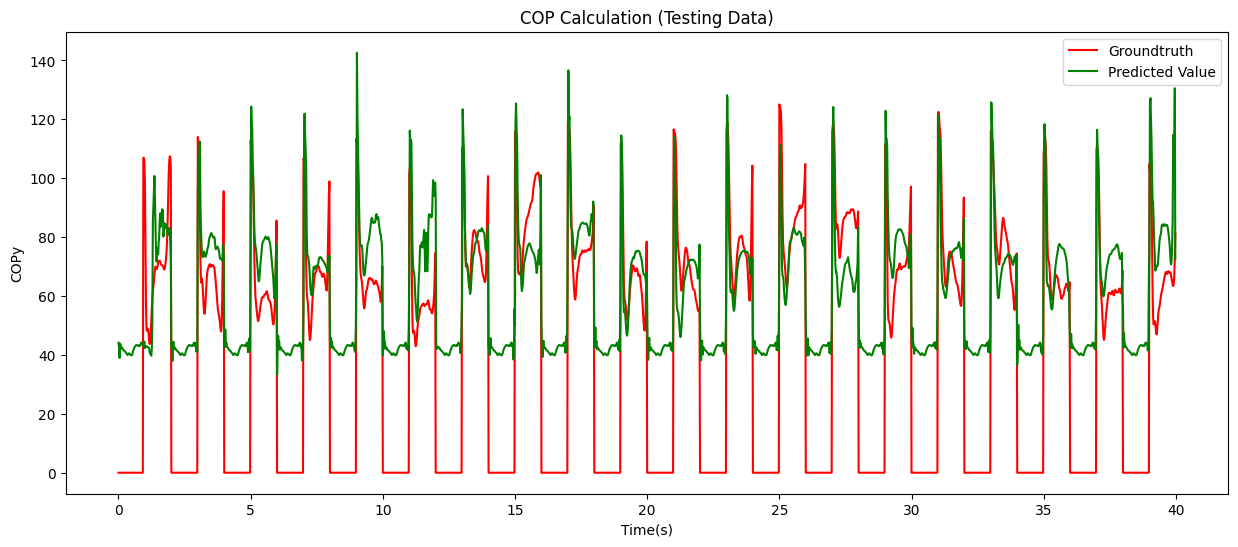

In [11]:
## Model Validation
Regression_Model.evaluate(X_test, y_test)
Test_xX_model = Regression_Model.predict(X_test)

print('MSE: ',mean_squared_error(y_test, Test_xX_model))
print('RMSE: ',math.sqrt(mean_squared_error(y_test, Test_xX_model)))
print('Coefficient of determination (r2 Score): ', r2_score(y_test, Test_xX_model))

#invert normalize
Test_y_inverse = []
Test_y_pred_inverse = []

for i in range(0,6):
  Test_Y_inver =  y_test[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Test_Pred_inver = Test_xX_model[:, i]*( FPmax[i] - FPmin[i] )+FPmin[i]
  Test_y_inverse.append(Test_Y_inver)
  Test_y_pred_inverse.append(Test_Pred_inver)
Test_y_inverse = np.array(Test_y_inverse)
Test_y_inverse = Test_y_inverse.transpose()
Test_y_pred_inverse = np.array(Test_y_pred_inverse)
Test_y_pred_inverse = Test_y_pred_inverse.transpose()

for i in range(len(Test_y_pred_inverse)):
    if (np.abs(Test_y_pred_inverse[i]) < 1).all():
        Test_y_pred_inverse[i] = 0

for i in range(0, Test_y_pred_inverse.shape[0], 50):
    zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) == 0
    non_zero_rows = np.count_nonzero(Test_y_pred_inverse[i:i+50, :], axis=1) > 0
    if np.sum(zero_rows) > np.sum(non_zero_rows):
        Test_y_pred_inverse[i:i+50, :][non_zero_rows] = 0.0

# make to original Data
# Test_FXData2 = Test_y_inverse[:,0]*2
# Test_FXData2=  np.array(Test_FXData2)
# Test_FXData2 = Test_FXData2.reshape(-1,1)

# Test_FYData2 = Test_y_inverse[:,1]*5
# Test_FYData2 =  np.array(Test_FYData2)
# Test_FYData2 = Test_FYData2.reshape(-1,1)

# Test_FZData2 = (Test_y_inverse[:,2]*100)
# Test_FZData2 =  np.array(Test_FZData2)
# Test_FZData2 = Test_FZData2.reshape(-1,1)

# Test_MXData2 = (Test_y_inverse[:,3]*10000)
# Test_MXData2 =  np.array(Test_MXData2)
# Test_MXData2 = Test_MXData2.reshape(-1,1)

# Test_MYData2 = (Test_y_inverse[:,4]*10000)
# Test_MYData2 =  np.array(Test_MYData2)
# Test_MYData2 = Test_MYData2.reshape(-1,1
#                           )
# Test_MZData2 = (Test_y_inverse[:,5]*1000)
# Test_MZData2 =  np.array(Test_MZData2)
# Test_MZData2 = Test_MZData2.reshape(-1,1)


# Test_new_inverse2 = np.concatenate((Test_FXData2, Test_FYData2, Test_FZData2, Test_MXData2, Test_MYData2, Test_MZData2), axis=1)

# Test_FXData3 = Test_y_pred_inverse[:,0]*2
# Test_FXData3=  np.array(Test_FXData3)
# Test_FXData3 = Test_FXData3.reshape(-1,1)

# Test_FYData3 = Test_y_pred_inverse[:,1]*5
# Test_FYData3 =  np.array(Test_FYData3)
# Test_FYData3 = Test_FYData3.reshape(-1,1)

# Test_FZData3 = (Test_y_pred_inverse[:,2]*100)
# Test_FZData3 =  np.array(Test_FZData3)
# Test_FZData3 = Test_FZData3.reshape(-1,1)

# Test_MXData3 = (Test_y_pred_inverse[:,3]*10000)
# Test_MXData3 =  np.array(Test_MXData3)
# Test_MXData3 = Test_MXData3.reshape(-1,1)

# Test_MYData3 = (Test_y_pred_inverse[:,4]*10000)
# Test_MYData3 =  np.array(Test_MYData3)
# Test_MYData3 = Test_MYData3.reshape(-1,1)

# Test_MZData3 = (Test_y_pred_inverse[:,5]*1000)
# Test_MZData3 =  np.array(Test_MZData3)
# Test_MZData3 = Test_MZData3.reshape(-1,1)

# Test_new_inverse3 = np.concatenate((Test_FXData3, Test_FYData3, Test_FZData3, Test_MXData3, Test_MYData3, Test_MZData3), axis=1)

Test_new_inverse2 = Test_y_inverse
Test_new_inverse3 = Test_y_pred_inverse

Test_new_inverse3 = Test_new_inverse3[np.argsort(Test_indices)]
Test_new_inverse2 = Test_new_inverse2[np.argsort(Test_indices)]

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,3000)*60/3000
for i in range(0,6):
    plt.figure(figsize=(15,6))
    # plt.figure()
    plt.plot(x,Test_new_inverse2[0:3000,i],color='red')
    plt.plot(x,Test_new_inverse3[0:3000,i], markerfacecolor='none',color='green')
    plt.title('ResNet Regression (Testing Data)')
    if i < 3:
      plt.ylabel('Force/'+columns[i])
    else:
      plt.ylabel('Moment/'+columns[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted'], loc='best')
    plt.show()

# COP
from math import*
np.seterr(divide='ignore', invalid='ignore')

Test_out_Fz = Test_new_inverse2[0:15000,2]
Test_out_Mx = Test_new_inverse2[0:15000,3]
Test_out_My = Test_new_inverse2[0:15000,4]
Test_Pred_Fz = Test_new_inverse3[0:15000,2]
Test_Pred_Mx = Test_new_inverse3[0:15000,3]
Test_Pred_My = Test_new_inverse3[0:15000,4]

Test_Pred_COPx=[]
for i in range(0,len(Test_Pred_Fz)):
  Test_Pred_COPx_temp=-(Test_Pred_My[i])/Test_Pred_Fz[i]
  if Test_Pred_COPx_temp != Test_Pred_COPx_temp:
    Test_Pred_COPx_temp=0
  Test_Pred_COPx.append(Test_Pred_COPx_temp)
  # break

Test_out_COPx=[]
for i in range(0,len(Test_out_Fz)):
  Test_out_COPx_temp=-(Test_out_My[i])/Test_out_Fz[i]
  if Test_out_COPx_temp != Test_out_COPx_temp:
    Test_out_COPx_temp=0
  Test_out_COPx.append(Test_out_COPx_temp)
  # break

Test_Pred_COPy=[]
for i in range(0,len(Test_Pred_Mx)):
  Test_Pred_COPy_temp=Test_Pred_Mx[i]/Test_Pred_Fz[i]
  if Test_Pred_COPy_temp != Test_Pred_COPy_temp:
    Test_Pred_COPy_temp=0
  Test_Pred_COPy.append(Test_Pred_COPy_temp)
  # break

Test_out_COPy=[]
for i in range(0,len(Test_out_Mx)):
  Test_out_COPy_temp=Test_out_Mx[i]/Test_out_Fz[i]
  if Test_out_COPy_temp != Test_out_COPy_temp:
    Test_out_COPy_temp=0
  Test_out_COPy.append(Test_out_COPy_temp)
  # break


Test_out_COPx = np.array(Test_out_COPx)
Test_out_COPx= Test_out_COPx.reshape(-1,1)

Test_out_COPy = np.array(Test_out_COPy)
Test_out_COPy= Test_out_COPy.reshape(-1,1)

Test_Pred_COPx = np.array(Test_Pred_COPx)
Test_Pred_COPx= Test_Pred_COPx.reshape(-1,1)

Test_Pred_COPy = np.array(Test_Pred_COPy)
Test_Pred_COPy= Test_Pred_COPy.reshape(-1,1)

Test_Pred_COP = np.concatenate((Test_Pred_COPx, Test_Pred_COPy), axis=1)
Test_FC_COP = np.concatenate((Test_out_COPx, Test_out_COPy), axis=1)

Test_col_COP = 'COPx', 'COPy'

x=[]
colors=['red','green','brown','teal','gray','black','maroon','orange','purple']
colors2=['green','red','orange','black','maroon','teal','blue','gray','brown']
x = np.arange(0,2000)*40/2000
for i in range(0,2):
    plt.figure(figsize=(15,6))
    plt.plot(x,Test_FC_COP[0:2000,i], color='red')
    plt.plot(x,Test_Pred_COP[0:2000,i],markerfacecolor='none',color='green')
    plt.title('COP Calculation (Testing Data)')
    plt.ylabel(col_COP[i])
    plt.xlabel('Time(s)')
    plt.legend(['Groundtruth', 'Predicted Value'], loc='best')
    plt.savefig('Regression Result.png'[i])
    plt.show()

# # Trajectory
# from matplotlib import pyplot

# x = range(50)
# Test_y1 = Test_FC_COP[50:100,0]
# Test_y2 = Test_FC_COP[50:100,1]
# Test_y3 = Test_Pred_COP[50:100,0]
# Test_y4 = Test_Pred_COP[50:100,1]

# # pyplot.figure(figsize=(15,6))
# # pyplot.plot(FC_COP[:,0],FC_COP[:,1])
# # pyplot.show()

# # Test_data_filter = abs(y1) > 0
# # Test_data_filter2 = abs(y3) > 0
# pyplot.figure(figsize=(15,6))
# # pyplot.plot(Test_y1[Test_data_filter], Test_y2[Test_data_filter ], color='red', alpha=0.3)
# # pyplot.plot(Test_y3[Test_data_filter2], Test_y4[Test_data_filter2 ], color='green')
# pyplot.plot(Test_y1, Test_y2, color='red')
# pyplot.plot(Test_y3, Test_y4, color='green')
# plt.title('COP Trajectory (Testing Data)')
# pyplot.ylabel('COPy (mm)')
# pyplot.xlabel('COPx (mm)')
# pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
# pyplot.show()

In [12]:
# x = range(100)
# Test_y1 = Test_FC_COP[0:100,0]
# Test_y2 = Test_FC_COP[0:100,1]
# Test_y3 = Test_Pred_COP[0:100,0]
# Test_y4 = Test_Pred_COP[0:100,1]

# pyplot.figure(figsize=(15,6))
# pyplot.plot(Test_y1, Test_y2, color='red')
# pyplot.plot(Test_y3, Test_y4, color='green')
# plt.title('COP Trajectory (Training Data)')
# pyplot.ylabel('COPy (mm)')
# pyplot.xlabel('COPx (mm)')
# pyplot.legend(['Groundtruth', 'Predicted'], loc='best')
# pyplot.show()